## Equation 3 Exploration

$$
\begin{align*}
\dot{X}(t) &= -U^\prime\left(X(t), \frac{t}{T}\right) + \sqrt{\epsilon~}\dot{W}(t)\\\\
\frac{dX}{dt} &= -\frac{\partial U}{\partial X}\left(X(t), \frac{t}{T}\right) + \sqrt{\epsilon~}\frac{dW}{dt}\\\\

dX &= \left[-\frac{\partial U}{\partial X}\left(X(t), \frac{t}{T}\right)\right] dt + \sqrt{\epsilon~}dW

\end{align*}
$$

Now we have it in the form we want.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from jax import grad, vmap

In [5]:
def sin_potential(x, t):
    a = 1.1
    b = -3.4
    c = -1.7
    T = 100000

    stationary = a*x**4 + b*x**2
    osc = np.sin((2*np.pi*t)/T)*x

    return stationary + osc + c

In [6]:
x = np.linspace(-2, 2, 1000)
t = np.linspace(0, 100000, 10001)

X, T = np.meshgrid(x, t)

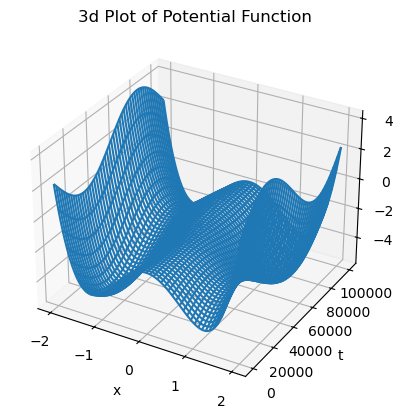

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, T, sin_potential(X, T))
ax.set_title('3d Plot of Potential Function')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

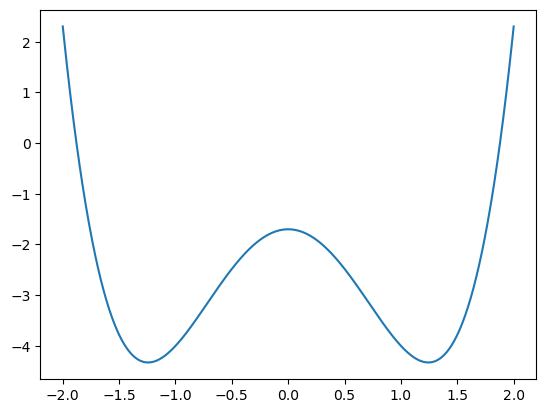

In [17]:
# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, sin_potential(x, 0))

# Function to update the plot for each frame
def update(t):
    y = sin_potential(x, t)
    line.set_ydata(y)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=50)

# Show the animation
plt.show()

In [23]:
import numpy.random as random

class model_params():
    def __init__(self, x_init=1.0, dt = 0.1, time_horizon=100000.0, num_trajectories=1):
        self.x_init = x_init
        self.time_horizon = time_horizon
        self.dt = dt
        self.num_steps = int(self.time_horizon/self.dt)
        self.num_trajectories = num_trajectories
        random.seed(1)
        self.time_vec = np.linspace(0.0, self.time_horizon, self.num_steps)

class climate_sde(model_params):
    def __init__(self, epsilon=0.2):
        super().__init__(self, x_init=1.0, dt = 0.1, time_horizon=100000.0, num_trajectories=1)
        self.epsilon = epsilon
        self.noise = random.normal(loc=0.0, scale=epsilon*self.dt, size=(self.num_steps, self.num_trajectories))

    def mu(self, x, t):
        return - grad(sin_potential, argnums=(0))(x, t)
    
    def sigma(self, x, t):
        return 1.0